In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
import warnings
warnings.filterwarnings("ignore")

In [12]:
df = pd.read_csv('/content/Social_Network_Ads.csv')
df.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [13]:
x = df.iloc[:,2:4]
y = df.iloc[:,-1]

In [14]:
x

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [15]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

x needs feature scaling

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state=4)

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [18]:
model = Sequential()
model.add(Dense(128,activation = 'relu',input_dim = 2))
model.add(Dense(1,activation = 'sigmoid'))

In [19]:
model.compile(optimizer= 'adam',loss = 'binary_crossentropy',metrics=["accuracy"])


In [20]:
history = model.fit(x_train,y_train,validation_data = (x_test,y_test),epochs = 100)

Epoch 1/100
10/10 [==============================] - 6s 40ms/step - loss: 4651.4624 - accuracy: 0.3812 - val_loss: 2211.4968 - val_accuracy: 0.2625
Epoch 2/100
10/10 [==============================] - 0s 7ms/step - loss: 904.1240 - accuracy: 0.5375 - val_loss: 788.2775 - val_accuracy: 0.7375
Epoch 3/100
10/10 [==============================] - 0s 7ms/step - loss: 624.3571 - accuracy: 0.5688 - val_loss: 458.2123 - val_accuracy: 0.2625
Epoch 4/100
10/10 [==============================] - 0s 5ms/step - loss: 168.7569 - accuracy: 0.4812 - val_loss: 158.1624 - val_accuracy: 0.2625
Epoch 5/100
10/10 [==============================] - 0s 7ms/step - loss: 89.9458 - accuracy: 0.4688 - val_loss: 53.1546 - val_accuracy: 0.2625
Epoch 6/100
10/10 [==============================] - 0s 7ms/step - loss: 110.8140 - accuracy: 0.5000 - val_loss: 89.2335 - val_accuracy: 0.2625
Epoch 7/100
10/10 [==============================] - 0s 7ms/step - loss: 97.0304 - accuracy: 0.4875 - val_loss: 39.6899 - val_accu

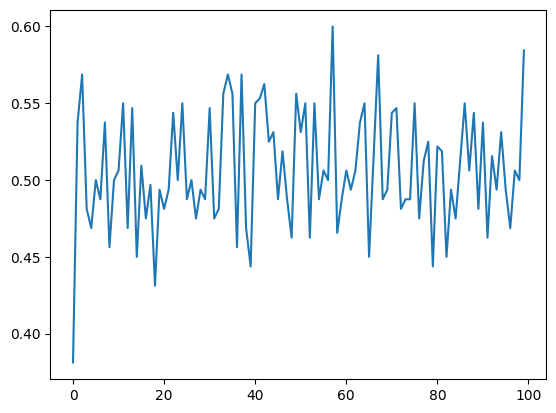

In [21]:
plt.plot(history.history['accuracy'])

In [22]:
#applying feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_scaled = sc.fit_transform(x_train)
x_test_scaled = sc.fit_transform(x_test)

In [23]:
model1 = Sequential()
model1.add(Dense(128,activation = 'relu',input_dim = 2))
model1.add(Dense(1,activation = 'sigmoid'))

In [24]:
model1.compile(optimizer= 'adam',loss = 'binary_crossentropy',metrics=["accuracy"])

In [25]:
history1 = model1.fit(x_train_scaled,y_train,validation_data = (x_test_scaled,y_test),epochs = 100)

Epoch 1/100
10/10 [==============================] - 1s 21ms/step - loss: 0.6553 - accuracy: 0.6281 - val_loss: 0.6191 - val_accuracy: 0.7750
Epoch 2/100
10/10 [==============================] - 0s 9ms/step - loss: 0.5964 - accuracy: 0.7875 - val_loss: 0.5684 - val_accuracy: 0.7875
Epoch 3/100
10/10 [==============================] - 0s 8ms/step - loss: 0.5458 - accuracy: 0.8125 - val_loss: 0.5285 - val_accuracy: 0.8000
Epoch 4/100
10/10 [==============================] - 0s 8ms/step - loss: 0.5063 - accuracy: 0.8406 - val_loss: 0.4955 - val_accuracy: 0.8000
Epoch 5/100
10/10 [==============================] - 0s 9ms/step - loss: 0.4714 - accuracy: 0.8438 - val_loss: 0.4669 - val_accuracy: 0.8125
Epoch 6/100
10/10 [==============================] - 0s 10ms/step - loss: 0.4411 - accuracy: 0.8469 - val_loss: 0.4444 - val_accuracy: 0.8250
Epoch 7/100
10/10 [==============================] - 0s 9ms/step - loss: 0.4170 - accuracy: 0.8500 - val_loss: 0.4241 - val_accuracy: 0.8250
Epoch 8/100

just by scaling it we are acheiving accuracy of 91% and loss is decreased significantly

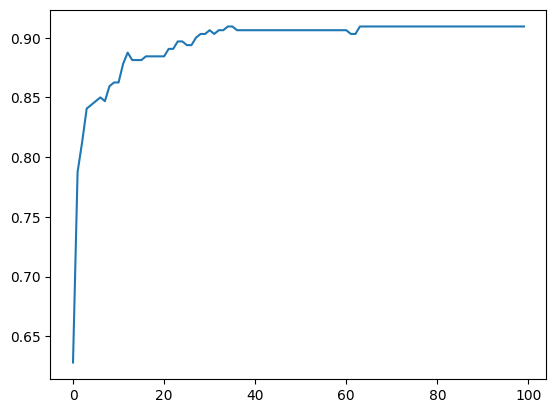

In [26]:
plt.plot(history1.history['accuracy'])

In [27]:
#Dropout

In [28]:
from tensorflow.keras.layers import Dropout

In [29]:
model2 = Sequential()
model2.add(Dense(128,activation = 'relu',input_dim = 2))
model2.add(Dropout(0.35))
model2.add(Dense(128,activation = 'relu',input_dim = 2))
model2.add(Dropout(0.3))
model2.add(Dense(128,activation = 'relu',input_dim = 2))
model2.add(Dropout(0.2))
model2.add(Dense(1,activation = 'sigmoid'))

In [30]:
model2.compile(optimizer= 'adam',loss = 'binary_crossentropy',metrics=["accuracy"])
history2 = model2.fit(x_train_scaled,y_train,validation_data = (x_test_scaled,y_test),epochs = 100)


Epoch 1/100
10/10 [==============================] - 2s 22ms/step - loss: 0.6301 - accuracy: 0.7469 - val_loss: 0.5594 - val_accuracy: 0.8250
Epoch 2/100
10/10 [==============================] - 0s 7ms/step - loss: 0.5020 - accuracy: 0.8531 - val_loss: 0.4459 - val_accuracy: 0.8000
Epoch 3/100
10/10 [==============================] - 0s 7ms/step - loss: 0.3869 - accuracy: 0.8469 - val_loss: 0.3945 - val_accuracy: 0.8000
Epoch 4/100
10/10 [==============================] - 0s 8ms/step - loss: 0.3188 - accuracy: 0.8719 - val_loss: 0.3615 - val_accuracy: 0.8375
Epoch 5/100
10/10 [==============================] - 0s 8ms/step - loss: 0.2796 - accuracy: 0.8781 - val_loss: 0.3610 - val_accuracy: 0.8375
Epoch 6/100
10/10 [==============================] - 0s 6ms/step - loss: 0.2587 - accuracy: 0.8938 - val_loss: 0.3176 - val_accuracy: 0.8875
Epoch 7/100
10/10 [==============================] - 0s 6ms/step - loss: 0.2863 - accuracy: 0.8844 - val_loss: 0.3090 - val_accuracy: 0.9000
Epoch 8/100


In [44]:
#regularization

In [45]:
from sklearn.datasets import make_moons

In [46]:
x,y = make_moons(n_samples = 250, noise = 0.2,random_state = 6)

In [47]:
x

array([[ 1.31999270e-01,  6.20871056e-01],
       [-8.12723584e-01,  7.08314642e-02],
       [ 5.06044156e-01, -9.46516732e-02],
       [ 3.24486693e-01, -3.95692984e-01],
       [ 1.78713418e+00,  6.35818544e-01],
       [ 4.82289555e-01,  7.90435930e-01],
       [-5.79750363e-01,  5.18399379e-01],
       [ 8.07573524e-01,  3.38419224e-01],
       [ 1.17954986e+00, -4.09083321e-01],
       [ 1.54774062e+00, -6.54362195e-02],
       [ 4.50111819e-01, -1.96219362e-01],
       [ 1.13476418e+00, -1.96781935e-01],
       [ 8.15880714e-01, -3.24778120e-01],
       [ 8.62150674e-01,  2.68066160e-01],
       [ 1.94666017e-01,  1.02167153e+00],
       [ 9.80449536e-01,  3.13020698e-01],
       [ 1.36642344e+00, -5.83197555e-01],
       [-9.01887671e-01,  7.09769896e-01],
       [ 3.10840707e-01,  8.78925204e-01],
       [ 1.61959723e+00, -2.73924963e-01],
       [ 3.64386850e-01,  1.19780905e+00],
       [ 1.26720182e+00, -7.74686701e-01],
       [ 1.98637811e+00, -6.42402508e-02],
       [ 7.

In [48]:
y

array([0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1])

In [49]:
#without regularization
model1 = Sequential()
model1.add(Dense(128,activation = 'relu',input_dim = 2))
model1.add(Dense(1,activation = 'sigmoid'))

In [50]:
model1.compile(optimizer= 'adam',loss = 'binary_crossentropy',metrics=["accuracy"])

In [51]:
history1 = model1.fit(x,y,validation_split = 0.2,epochs = 2000)


Epoch 1/2000
7/7 [==============================] - 1s 43ms/step - loss: 0.7121 - accuracy: 0.3800 - val_loss: 0.6928 - val_accuracy: 0.5600
Epoch 2/2000
7/7 [==============================] - 0s 13ms/step - loss: 0.6724 - accuracy: 0.7350 - val_loss: 0.6586 - val_accuracy: 0.7600
Epoch 3/2000
7/7 [==============================] - 0s 13ms/step - loss: 0.6360 - accuracy: 0.8300 - val_loss: 0.6272 - val_accuracy: 0.7600
Epoch 4/2000
7/7 [==============================] - 0s 12ms/step - loss: 0.6032 - accuracy: 0.8400 - val_loss: 0.5993 - val_accuracy: 0.7600
Epoch 5/2000
7/7 [==============================] - 0s 12ms/step - loss: 0.5731 - accuracy: 0.8400 - val_loss: 0.5737 - val_accuracy: 0.7600
Epoch 6/2000
7/7 [==============================] - 0s 13ms/step - loss: 0.5470 - accuracy: 0.8400 - val_loss: 0.5497 - val_accuracy: 0.7600
Epoch 7/2000
7/7 [==============================] - 0s 13ms/step - loss: 0.5224 - accuracy: 0.8400 - val_loss: 0.5289 - val_accuracy: 0.7600
Epoch 8/2000


accuaracy = 97,92

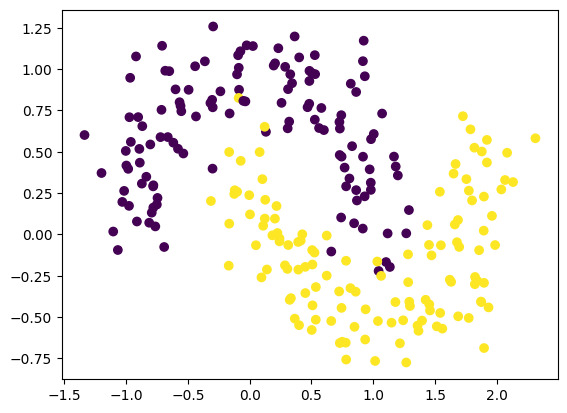

In [52]:
plt.scatter(x[:,0],x[:,1],c=y)

9600/9600 [==============================] - 16s 2ms/step


<Axes: >

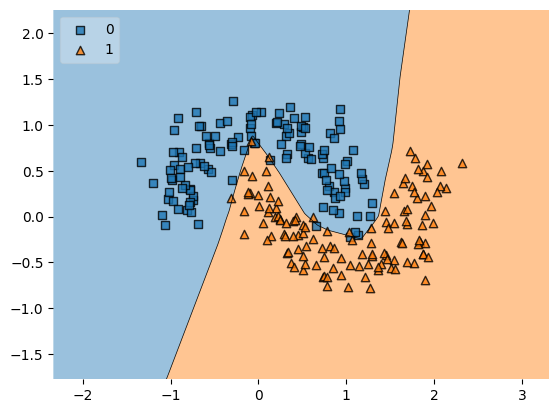

In [53]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x,y.astype('int'),clf = model1,legend = 2)

In [54]:
#with regularization
model1 = Sequential()
model1.add(Dense(128,activation = 'relu',input_dim = 2,kernel_regularizer=tf.keras.regularizers.l2(0.03)))
model1.add(Dense(128,activation = 'relu',kernel_regularizer=tf.keras.regularizers.l2(0.03)))
model1.add(Dense(1,activation = 'sigmoid'))
model1.compile(optimizer= 'adam',loss = 'binary_crossentropy',metrics=["accuracy"],)
history1 = model1.fit(x,y,validation_split = 0.2,epochs = 1000)


Epoch 1/1000
7/7 [==============================] - 2s 46ms/step - loss: 4.4999 - accuracy: 0.6200 - val_loss: 4.1631 - val_accuracy: 0.7600
Epoch 2/1000
7/7 [==============================] - 0s 13ms/step - loss: 3.9675 - accuracy: 0.8450 - val_loss: 3.6704 - val_accuracy: 0.7600
Epoch 3/1000
7/7 [==============================] - 0s 12ms/step - loss: 3.4997 - accuracy: 0.8350 - val_loss: 3.2410 - val_accuracy: 0.7600
Epoch 4/1000
7/7 [==============================] - 0s 12ms/step - loss: 3.0884 - accuracy: 0.8400 - val_loss: 2.8626 - val_accuracy: 0.7600
Epoch 5/1000
7/7 [==============================] - 0s 11ms/step - loss: 2.7235 - accuracy: 0.8300 - val_loss: 2.5307 - val_accuracy: 0.7800
Epoch 6/1000
7/7 [==============================] - 0s 12ms/step - loss: 2.4015 - accuracy: 0.8450 - val_loss: 2.2382 - val_accuracy: 0.7800
Epoch 7/1000
7/7 [==============================] - 0s 12ms/step - loss: 2.1205 - accuracy: 0.8400 - val_loss: 1.9831 - val_accuracy: 0.7800
Epoch 8/1000


accuaracy 96,98 just by adding l2 regulaizer 0.03

9600/9600 [==============================] - 17s 2ms/step


<Axes: >

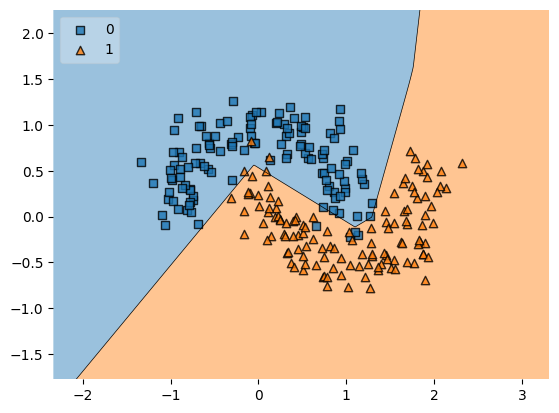

In [55]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x,y.astype('int'),clf = model1,legend = 2)

In [58]:
#Batchnormalization
from tensorflow.keras.layers import BatchNormalization

model1 = Sequential()
model1.add(Dense(128,activation = 'relu',input_dim = 2,kernel_regularizer=tf.keras.regularizers.l2(0.03)))
model1.add(BatchNormalization())
model1.add(Dense(128,activation = 'relu',kernel_regularizer=tf.keras.regularizers.l2(0.03)))
model1.add(BatchNormalization())
model1.add(Dense(1,activation = 'sigmoid'))
model1.compile(optimizer= 'adam',loss = 'binary_crossentropy',metrics=["accuracy"])
history1 = model1.fit(x,y,validation_split = 0.2,epochs = 1000)

Epoch 1/1000
7/7 [==============================] - 2s 37ms/step - loss: 4.5275 - accuracy: 0.7200 - val_loss: 4.4420 - val_accuracy: 0.8000
Epoch 2/1000
7/7 [==============================] - 0s 9ms/step - loss: 3.9662 - accuracy: 0.9200 - val_loss: 4.1723 - val_accuracy: 0.8000
Epoch 3/1000
7/7 [==============================] - 0s 12ms/step - loss: 3.6815 - accuracy: 0.9150 - val_loss: 3.9194 - val_accuracy: 0.7800
Epoch 4/1000
7/7 [==============================] - 0s 10ms/step - loss: 3.3557 - accuracy: 0.9450 - val_loss: 3.6708 - val_accuracy: 0.8000
Epoch 5/1000
7/7 [==============================] - 0s 11ms/step - loss: 3.1073 - accuracy: 0.9550 - val_loss: 3.4325 - val_accuracy: 0.7800
Epoch 6/1000
7/7 [==============================] - 0s 9ms/step - loss: 2.8539 - accuracy: 0.9650 - val_loss: 3.2045 - val_accuracy: 0.8000
Epoch 7/1000
7/7 [==============================] - 0s 11ms/step - loss: 2.6598 - accuracy: 0.9500 - val_loss: 2.9894 - val_accuracy: 0.8200
Epoch 8/1000
7/

using batchnormalization loss is reduced significantly